In [19]:
import numpy as np
import matplotlib.pyplot as plt


In [59]:
run TP1920.py


In [60]:
# Converter e definir as imagens
#resizeImageAndConvert()

In [61]:
# Ler das imagens para uma matriz 'X' e um array 'lista'
X, lista, size = readImages()
size

48

In [62]:
X[1].shape

(65025,)

In [63]:
X.shape


(48, 65025)

In [64]:
# Obter os vectores pp de acordo com um certo nivel de confianca
k, eigenvalues, eigenvectors, phi, mean, variance = pca(X, 7, 0.75)
eigenvalues

Número de vectores pp a usar: 7
Número de vectores fixos a utilizar: 7


array([1.00869099e+09, 6.19188595e+08, 4.35779250e+08, 3.44530890e+08,
       2.26068203e+08, 1.31465245e+08, 1.09521515e+08, 8.11303696e+07,
       6.76638661e+07, 5.63355374e+07, 5.18214455e+07, 5.11439369e+07,
       4.72851992e+07, 4.12271639e+07, 3.75110815e+07, 3.21917090e+07,
       3.17179961e+07, 2.83533316e+07, 2.69554564e+07, 2.57687866e+07,
       2.30993236e+07, 2.09821907e+07, 1.96553591e+07, 1.91886680e+07,
       1.82429692e+07, 1.68259475e+07, 1.58000295e+07, 1.50220309e+07,
       1.40354211e+07, 1.35912543e+07, 1.23987780e+07, 1.16291114e+07,
       1.11702623e+07, 1.03194000e+07, 9.50276006e+06, 8.87648265e+06,
       8.70859376e+06, 8.60815525e+06, 8.24206338e+06, 7.73722020e+06,
       7.61733886e+06, 6.94365092e+06, 6.78659052e+06, 5.14986980e+06,
       4.87394844e+06, 4.05670949e+06, 3.90457562e+06, 1.20451912e-22])

Número de vectores pp a usar: 7
Número de vectores fixos a utilizar: 7


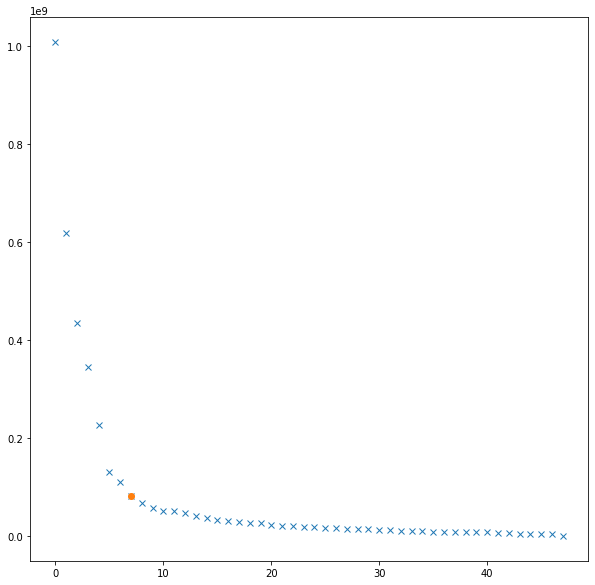

In [65]:
# Obter os vectores pp de acordo com um certo nivel de confianca
k, eigenvalues, eigenvectors, phi, mean, variance = pca(X, 7, 0.75)
# Alterar nome da variável
ponto=eigenvalues
# Obter o gráfico do cotovelo
plt.figure(figsize=(10,10))
t = np.arange(0, size, 1)
plt.plot(t, eigenvalues, 'x')
#plt.plot(np.argmin(ponto), eigenvalues[np.argmin(ponto)], 'o')
plt.plot(k, eigenvalues[k], 'o')
plt.show()

In [66]:
eigenvectors.T[0]

array([-0.00064952, -0.00067356, -0.00066299, ..., -0.00041102,
       -0.00040529, -0.00027831])

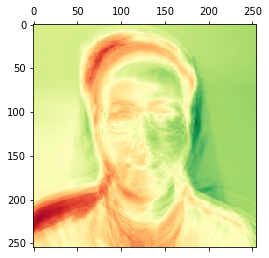

In [67]:
# Exemplo de uma eigenface do dataset
display(plt.matshow(np.reshape(eigenvectors.T[0], (255,255)), cmap=plt.cm.RdYlGn))

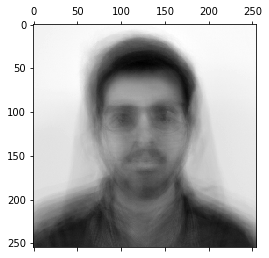

In [68]:
# Exemplo da "cara média" do dataset
display(plt.matshow(np.reshape(mean, (255,255)), cmap='gray'))

In [69]:
# Obter os coeficientes das projeccoes das eigenfaces
coef_proj = coefProj(phi, eigenvectors, X.shape[0])
coef_proj

[array([-5063.64161349,   482.82292275,  5867.89817726, -2012.31563211,
         -990.71852359,  2093.59263324,  -110.36709565]),
 array([ 6023.28112691,   749.64226173,  1660.50609709,   762.64246191,
        -2201.26886661,   663.06371829,   -88.89963777]),
 array([-2684.60360399,  -924.82719909,  1150.09947706, -3363.8145327 ,
          262.97440744, -2884.76165632, -2539.20006291]),
 array([-5222.19599368, -1772.9657822 , -4855.72771586,  -770.05080027,
        -1827.78071508,  1097.73438816,   104.6057402 ]),
 array([-4553.28461202, -1347.02521301, -4584.75148474, -1070.59811691,
        -1425.59239599,  -123.48483009,  -406.55894423]),
 array([-2669.31373289, -1897.35383036,  2006.64426879,  4950.8082263 ,
         1509.33457554,  -441.21975697,  -754.62982198]),
 array([ 8119.73354192,  -418.48905923, -1161.26319375, -1464.85694993,
         1202.01556723,  2487.53303796, -1393.27391054]),
 array([-1973.88699187,  9519.96908317,  -466.15285658,   448.42967064,
         2530.8835

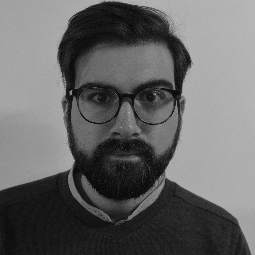

In [70]:
# Imagem para teste
input_img = Image.open('TestSet/rafa_oculos_serious.gif').convert('L')
input_img

Imagem nr.: 6
Distancia minima: 1995.04
Distancia máxima: 15041.1



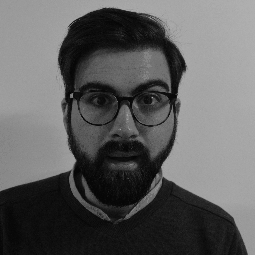

In [71]:
# Teste do reconhecimento
dist, test_coef_proj = testar(input_img, mean, eigenvectors, eigenvalues, X.shape[0], coef_proj, 'euclidian')
image = -1
if np.size(dist) > 0 : 
    image = lista[np.argmin(dist)]
image

In [72]:
coef_proj = np.reshape(coef_proj, (eigenvectors.shape[1], size))
#distance = np.sum( np.divide((coef_proj[:,4]-test_coef_proj)**2, eigenvalues[:eigenvectors.shape[1]]) )
#distance

In [68]:
def mahalanobis(x, y, eigenvalues, k):
    if len(x[0]) != len(y):
        return (-1) 
    N = len(x)
    distance =[]
    for i in range(N):
        distance.append(np.sum(np.divide((x[i]-y)**2, eigenvalues[:k]))) 
    return distance

In [73]:
coef_proj = np.reshape(coef_proj, (eigenvectors.shape[1], size))
dist = mahalanobis(coef_proj, test_coef_proj, eigenvalues, eigenvectors.shape[1])
#distanceMahalanobis = np.sum(dist)
np.min(dist)

-1

In [70]:
# Conclusoes: nao consegue reconhecer quando tem uma luz de lado. Caso contrario, faz bem o reconhecimento.